In [30]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [102]:
df = pd.read_csv("log_130520202248.csv")

In [58]:
df_median = pd.read_csv("log_median15percent.csv")

In [69]:
df


,detectorName,descriptorName,img,ttc_lidar,ttc_camera,t_total
0,AKAZE AKAZE,AKAZE,1,12.97220,12.48610,0.494697
1,AKAZE AKAZE,AKAZE,2,12.26400,13.59710,0.416006
2,AKAZE AKAZE,AKAZE,3,13.91610,12.90950,0.429462
3,AKAZE AKAZE,AKAZE,4,15.80400,13.86850,0.412568
4,AKAZE AKAZE,AKAZE,5,12.59510,15.10260,0.395676
...,...,...,...,...,...,...
535,SIFT SIFT,SIFT,14,10.96780,11.57410,0.499224
536,SIFT SIFT,SIFT,15,8.09422,9.66204,0.505846
537,SIFT SIFT,SIFT,16,8.81392,8.97689,0.509526
538,SIFT SIFT,SIFT,17,10.29260,8.51676,0.505617


In [41]:
fastbrief = df[(df['detectorName'] == "FAST") & (df['descriptorName'] == "BRIEF")]

In [91]:
df["detectorName"] = df["detectorName"].astype(str) + " " + df["descriptorName"]

In [42]:
fastbrief

,detectorName,descriptorName,img,ttc_lidar,ttc_camera,t_total
108,FAST,BRIEF,1,12.97220,11.18290,0.400873
109,FAST,BRIEF,2,12.26400,11.55460,0.486893
110,FAST,BRIEF,3,13.91610,12.96880,0.474340
111,FAST,BRIEF,4,15.80400,13.12320,0.446364
112,FAST,BRIEF,5,12.59510,20.03870,0.453823
113,FAST,BRIEF,6,7.14812,13.28480,0.442538
114,FAST,BRIEF,7,34.34040,11.47270,0.416394
115,FAST,BRIEF,8,18.78750,11.09240,0.424718
116,FAST,BRIEF,9,15.88940,11.00360,0.414429
117,FAST,BRIEF,10,13.72970,13.65440,0.400905


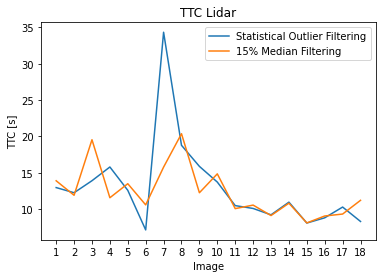

In [59]:
fig, ax = plt.subplots()
ax.plot(fastbrief.img, fastbrief.ttc_lidar, label="Statistical Outlier Filtering")  
ax.plot(df_median.img, df_median.ttc_lidar, label="15% Median Filtering")
ax.set_xticks(fastbrief.img)
ax.set_ylabel("TTC [s]")
ax.set_xlabel("Image")
ax.set_title("TTC Lidar")
ax.legend()
plt.savefig("fp_5_lidar_ttc.svg")

In [70]:
dfg = df.groupby('detectorName')

In [113]:
def plot(detector):
    df_sub = df[df['detectorName'] == detector]
    fig, ax = plt.subplots(figsize=(8,6))
    for label, dft in df_sub.groupby('descriptorName'):
        ax.plot(dft.img, dft.ttc_camera, label=label)
    ax.set_ylim([4.0, 25.0])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xticks(dft.img)
    ax.set_ylabel("TTC [s]")
    ax.set_xlabel("Image")
    ax.set_title("TTC Camera " + detector)
    plt.savefig("fp6_ttc_camera_{}.svg".format(detector))

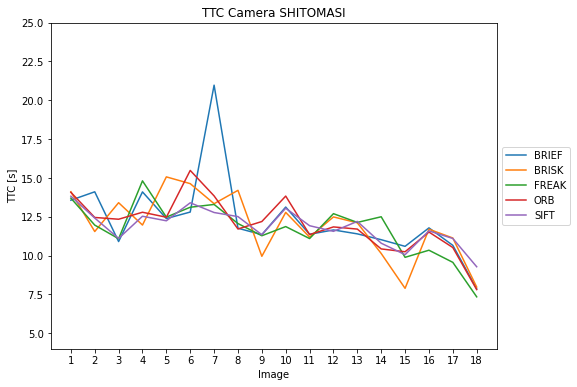

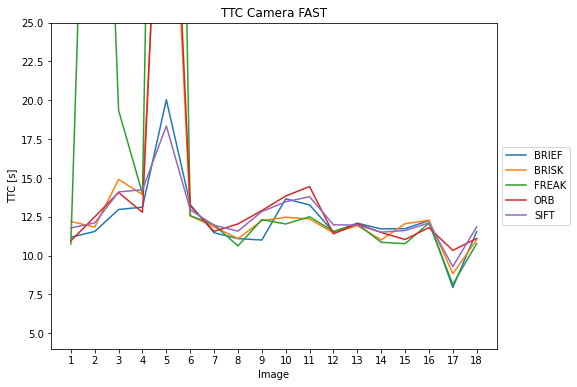

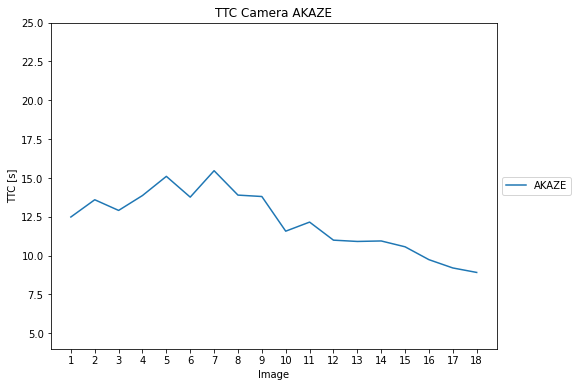

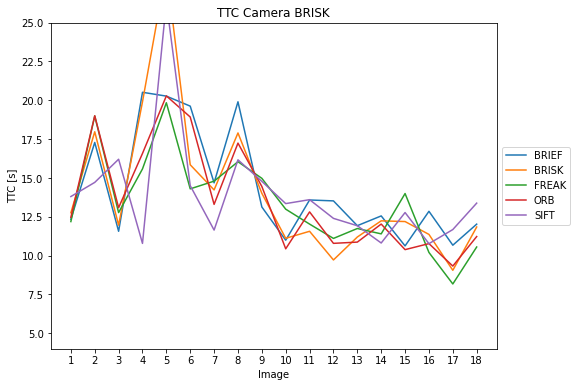

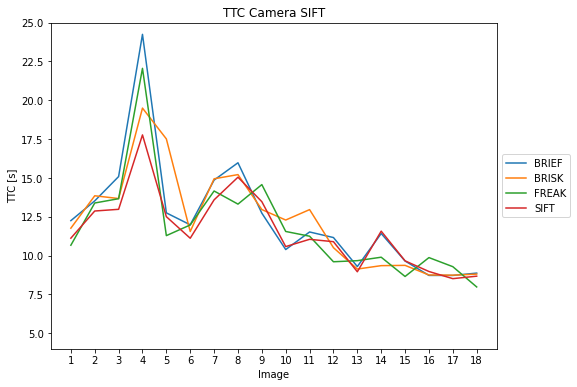

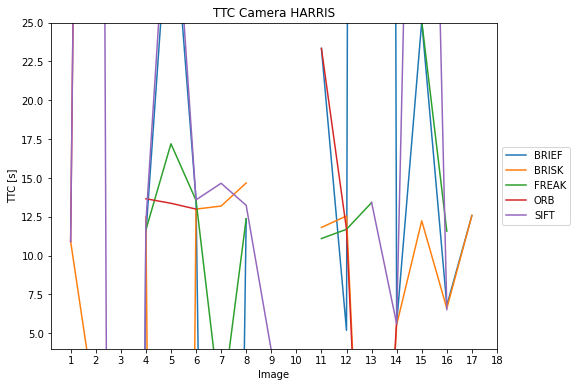

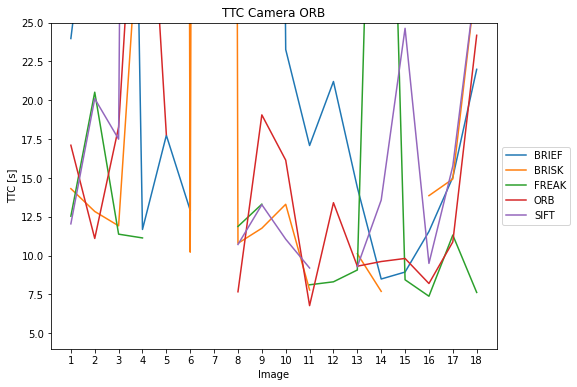

In [114]:
detectors = ["SHITOMASI", "FAST", "AKAZE", "BRISK", "SIFT", "HARRIS", "ORB"]
for d in detectors:
    plot(d)

In [101]:
dfg.ttc_camera.std().sort_values()

detectorName
SHITOMASI SIFT       1.151013
SHITOMASI FREAK      1.722015
SHITOMASI ORB        1.723581
FAST SIFT            1.836864
AKAZE AKAZE          1.968443
SHITOMASI BRISK      2.068016
FAST BRIEF           2.315519
SIFT SIFT            2.422206
SHITOMASI BRIEF      2.620174
BRISK FREAK          2.986354
SIFT BRISK           3.147647
SIFT FREAK           3.218694
BRISK ORB            3.407059
BRISK BRIEF          3.518200
BRISK SIFT           3.547439
SIFT BRIEF           3.694519
BRISK BRISK          4.644590
HARRIS FREAK         6.001232
FAST BRISK           7.831152
FAST ORB             8.341506
FAST FREAK          23.287027
HARRIS SIFT         80.596432
HARRIS BRIEF       169.818997
HARRIS BRISK              NaN
HARRIS ORB                NaN
ORB BRIEF                 NaN
ORB BRISK                 NaN
ORB FREAK                 NaN
ORB ORB                   NaN
ORB SIFT                  NaN
Name: ttc_camera, dtype: float64

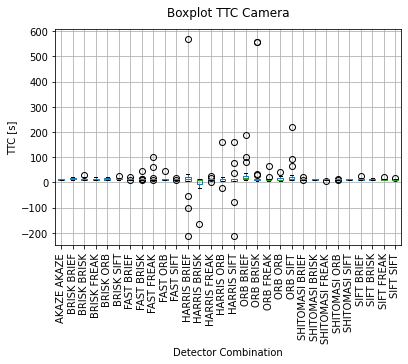

In [100]:
fig_box, ax_box = plt.subplots()
#fig_box.set_size_inches((2.9, 2.9))
bp = df.boxplot(column=['ttc_camera'], by='detectorName', showfliers=True, ax=ax_box, return_type='dict')
plt.xticks(rotation=90)
ax_box.set_ylabel("TTC [s]")
ax_box.set_xlabel("Detector Combination")
fig_box.suptitle("Boxplot TTC Camera")
ax_box.set_title("")
plt.savefig("fp_6_boxplot.svg")

In [108]:
df[df['detectorName'] == 'AKAZE']

,detectorName,descriptorName,img,ttc_lidar,ttc_camera,t_total
0,AKAZE,AKAZE,1,12.97220,12.48610,0.494697
1,AKAZE,AKAZE,2,12.26400,13.59710,0.416006
2,AKAZE,AKAZE,3,13.91610,12.90950,0.429462
3,AKAZE,AKAZE,4,15.80400,13.86850,0.412568
4,AKAZE,AKAZE,5,12.59510,15.10260,0.395676
5,AKAZE,AKAZE,6,7.14812,13.76530,0.401259
6,AKAZE,AKAZE,7,34.34040,15.46640,0.405186
7,AKAZE,AKAZE,8,18.78750,13.89580,0.393715
8,AKAZE,AKAZE,9,15.88940,13.80530,0.377957
9,AKAZE,AKAZE,10,13.72970,11.57350,0.391851
